# Palaskas Georgios
# Machine Learning
# Project 1/Regression

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Data insertion

In [40]:
#load diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
#create the dataframe
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.00000
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.00000
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.00000
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.00000
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.00000


In [41]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.04171,0.05068,0.01966,0.05974,-0.00570,-0.00257,-0.02867,-0.00259,0.03119,0.00721,178.00000
438,-0.00551,0.05068,-0.01591,-0.06764,0.04934,0.07917,-0.02867,0.03431,-0.01811,0.04449,104.00000
439,0.04171,0.05068,-0.01591,0.01729,-0.03734,-0.01384,-0.02499,-0.01108,-0.04688,0.01549,132.00000
440,-0.04547,-0.04464,0.03906,0.00122,0.01632,0.01528,-0.02867,0.02656,0.04453,-0.02593,220.00000
441,-0.04547,-0.04464,-0.07303,-0.08141,0.08374,0.02781,0.17382,-0.03949,-0.00422,0.00306,57.00000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# A peek at the Data

In [43]:
# Print the dimensions of the DataFrame
print("DataFrame dimensions:")
print(df.shape)

DataFrame dimensions:
(442, 11)


In [44]:
# data type of each attribute 
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

# Statistical summary

In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,152.13348
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318,87.00000
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792,211.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000


# Summary :
# 
 -All the attributes have 442 values
 
 -The mean of all values of each atttribute is around 0

 -The std is around 0,048 for each attribute 

So probably our data are normalized and standardized

# number or males/females in the Dataset 

In [46]:
df.groupby('sex').size()

sex
-0.04464    235
0.05068     207
dtype: int64

# Data correlation 

In [47]:
df.corr(method='pearson')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00000,0.17374,0.18508,0.33543,0.26006,0.21924,-0.07518,0.20384,0.27077,0.30173,0.18789
sex,0.17374,1.00000,0.08816,0.24101,0.03528,0.14264,-0.37909,0.33212,0.14992,0.20813,0.04306
bmi,0.18508,0.08816,1.00000,0.39541,0.24978,0.26117,-0.36681,0.41381,0.44616,0.38868,0.58645
bp,0.33543,0.24101,0.39541,1.00000,0.24246,0.18555,-0.17876,0.25765,0.39348,0.39043,0.44148
s1,0.26006,0.03528,0.24978,0.24246,1.00000,0.89666,0.05152,0.54221,0.51550,0.32572,0.21202
s2,0.21924,0.14264,0.26117,0.18555,0.89666,1.00000,-0.19646,0.65982,0.31836,0.29060,0.17405
s3,-0.07518,-0.37909,-0.36681,-0.17876,0.05152,-0.19646,1.00000,-0.73849,-0.39858,-0.27370,-0.39479
s4,0.20384,0.33212,0.41381,0.25765,0.54221,0.65982,-0.73849,1.00000,0.61786,0.41721,0.43045
s5,0.27077,0.14992,0.44616,0.39348,0.51550,0.31836,-0.39858,0.61786,1.00000,0.46467,0.56588
s6,0.30173,0.20813,0.38868,0.39043,0.32572,0.29060,-0.27370,0.41721,0.46467,1.00000,0.38248


# Correlation matrix

<Axes: >

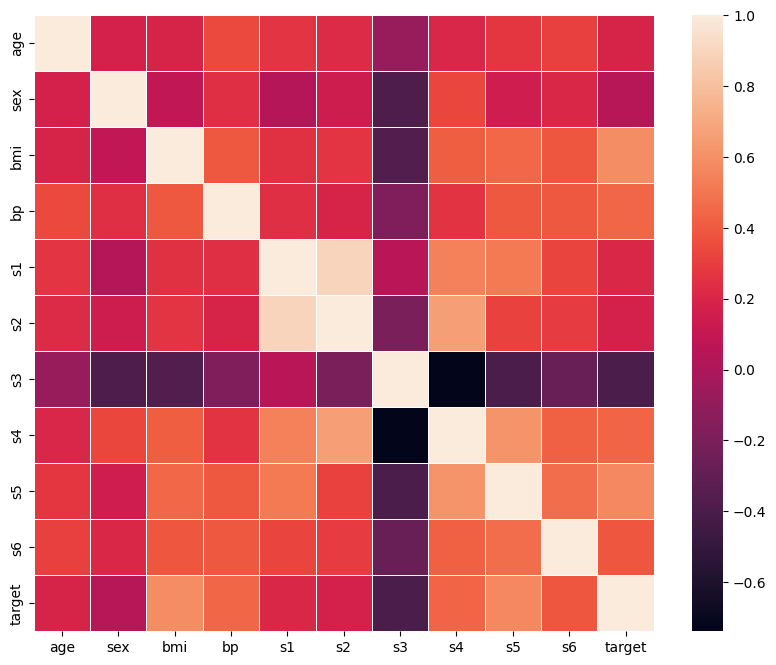

In [48]:
correlations = df.corr()
# plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, linewidths=0.5)

# Skew of Univariate Distributions

In [49]:
df.skew()

age      -0.23138
sex       0.12738
bmi       0.59815
bp        0.29066
s1        0.37811
s2        0.43659
s3        0.79926
s4        0.73537
s5        0.29175
s6        0.20792
target    0.44056
dtype: float64

diaplay the class distribution

In [50]:
df.groupby('target').size()

target
25.00000     1
31.00000     1
37.00000     1
39.00000     2
40.00000     1
            ..
321.00000    1
332.00000    1
336.00000    1
341.00000    1
346.00000    1
Length: 214, dtype: int64

# Histogram of each attribute

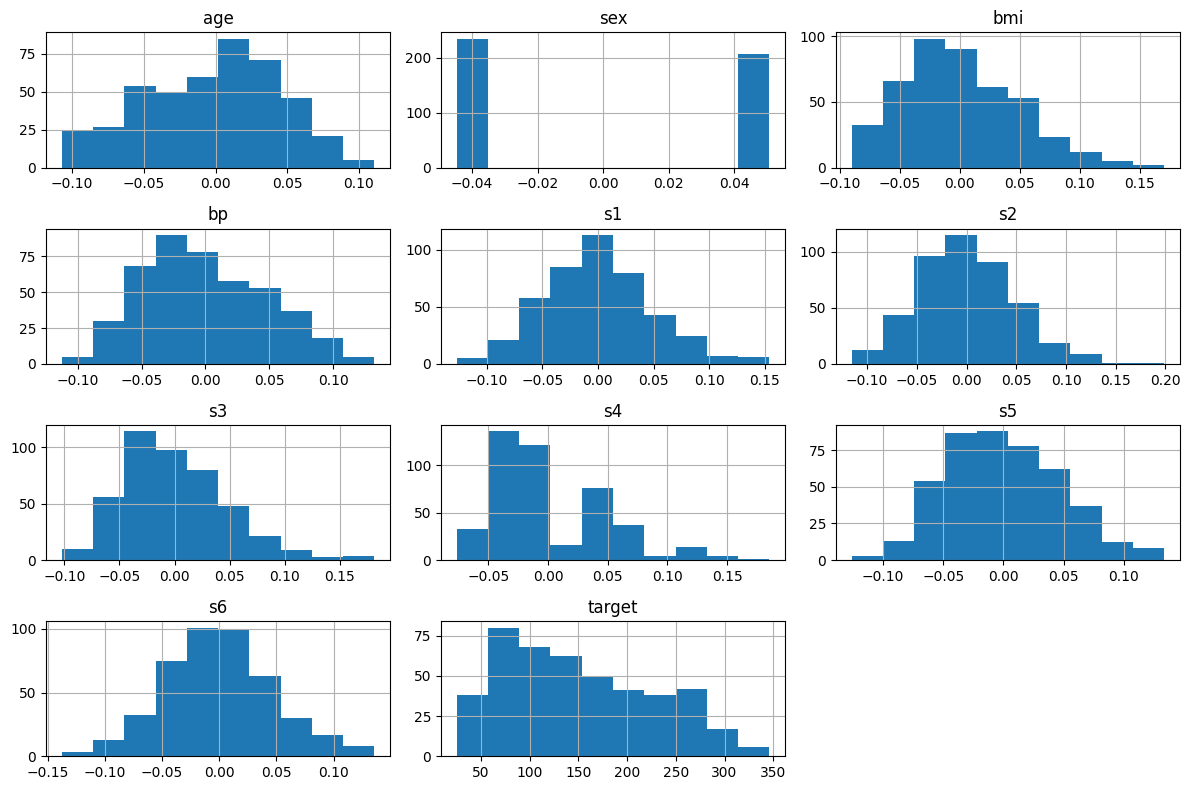

In [51]:
h = df.hist( figsize=(12, 8))
plt.tight_layout()
plt.show()

# Destiny plots

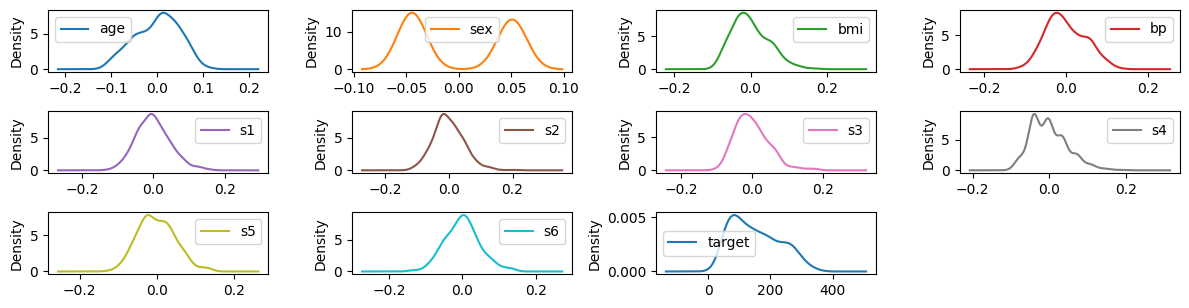

In [52]:
df.plot(kind='density', subplots=True, layout=(8,4), sharex=False, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots

<Axes: >

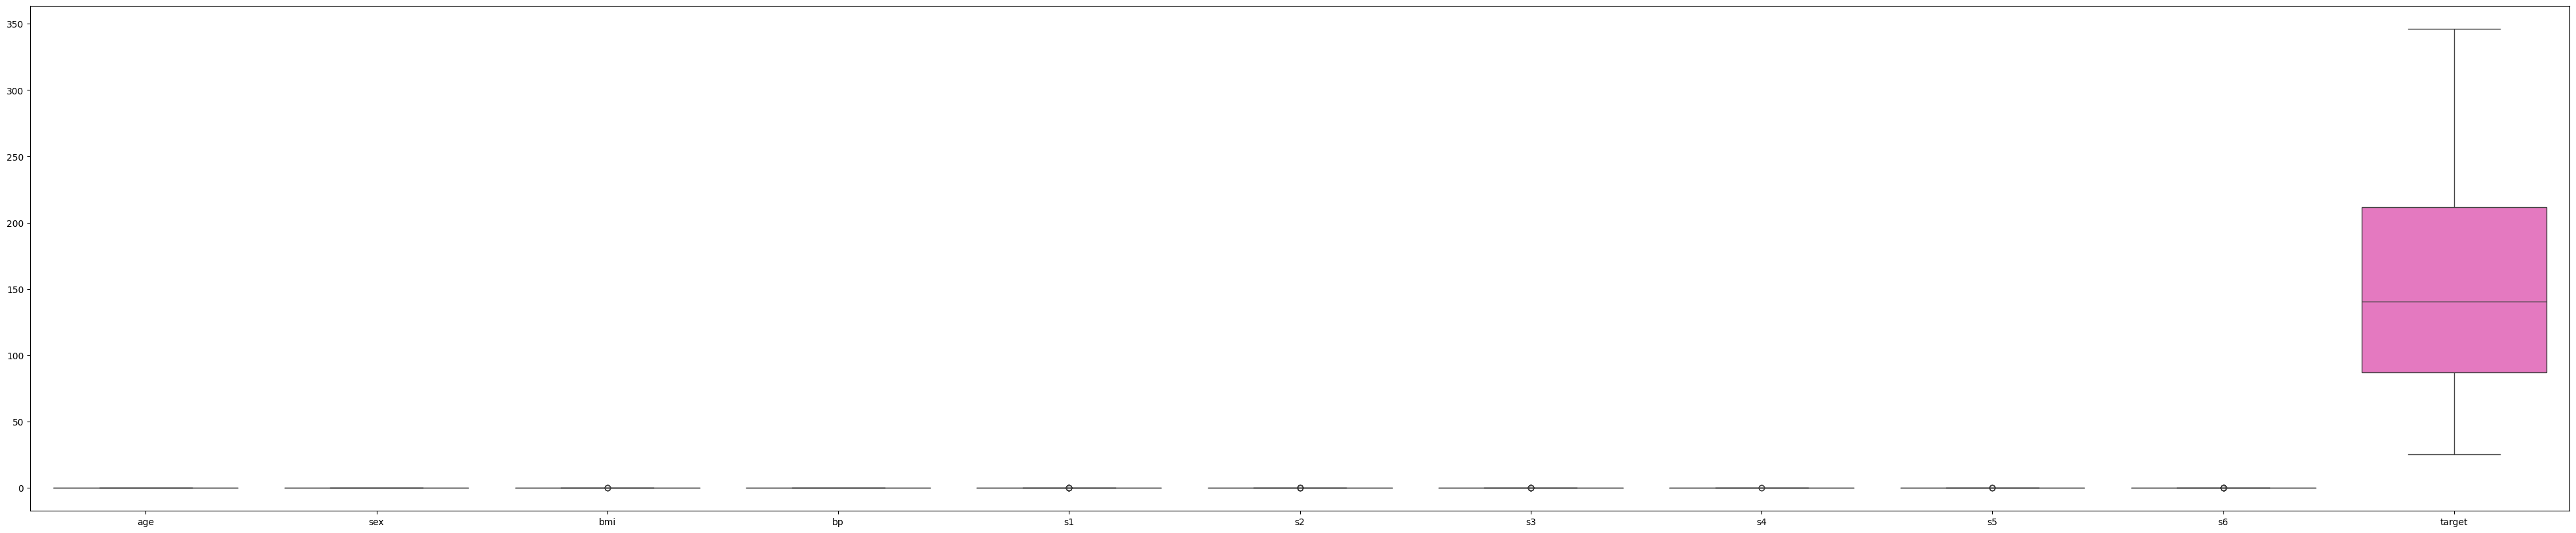

In [53]:
f = plt.figure(figsize=(50,10))
plt.tight_layout()
sns.boxplot(data=df)

removing the  target 

<Axes: >

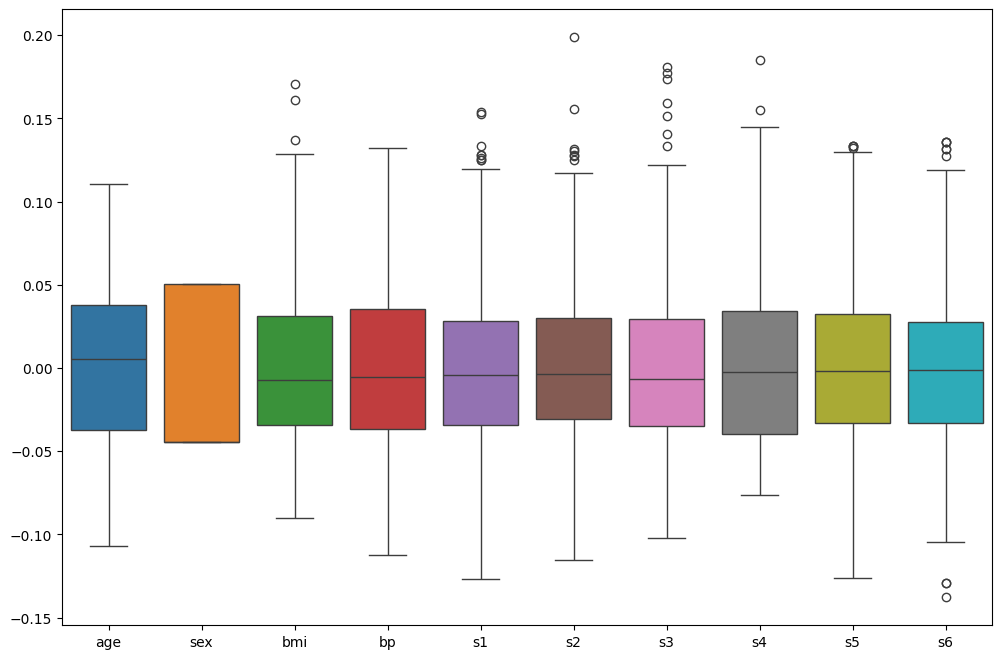

In [54]:
stats1_df = df.drop(['target'], axis=1)
plt.figure(figsize=(12,8))
sns.boxplot(data=stats1_df)

# Scatter plots

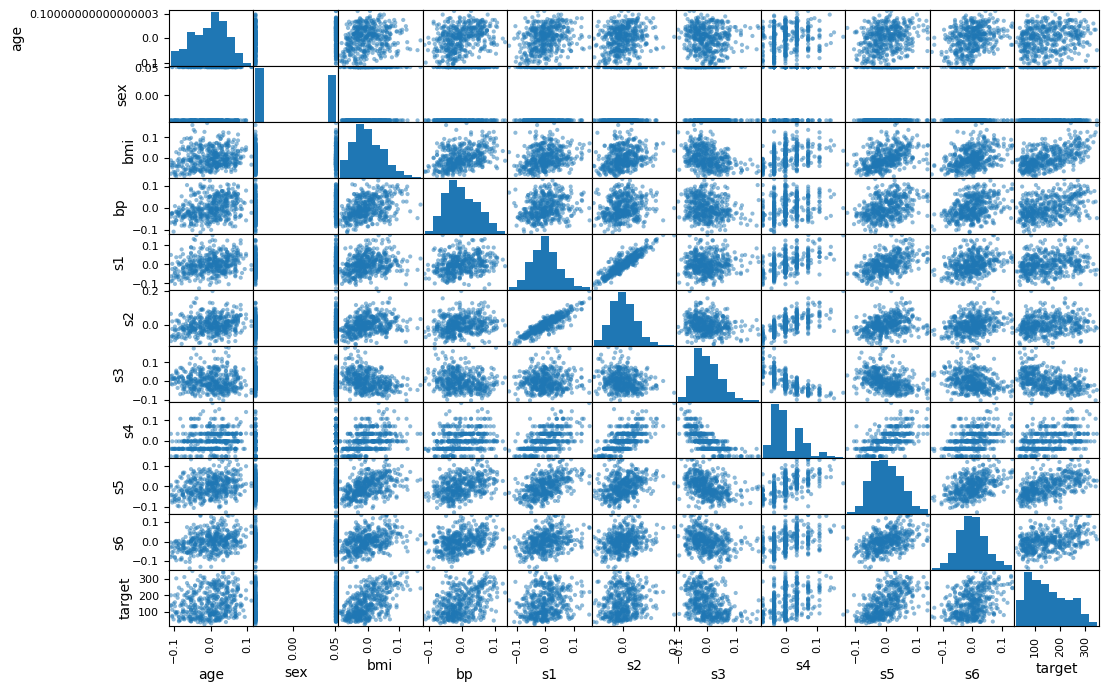

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12, 8))
plt.show()

# Regression

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
array = df.values
X = array[:,0:10]
Y = array[:,10]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
#normalize data
scaler1 = MinMaxScaler(feature_range=(0, 1))
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)
#standardize data
scaler2 = StandardScaler().fit(X_train)
standardized_X_train = scaler2.transform(X_train)
standardized_X_test = scaler2.transform(X_test)


# We are compare a set of algorithms:

- Linear Regression
- Ridge Regression
- Lasso Regression
- ElasticNet Regression
- kNN
- Regression Trees


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))

In [58]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

compare the data

In [59]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3066.488227 (+/- 612.055025)
     RIDGE: -3566.434465 (+/- 805.539578)
     LASSO: -3948.907268 (+/- 890.994536)
   ELASTIC: -6129.207158 (+/- 1278.974981)
       kNN: -3522.138403 (+/- 721.756660)
        DT: -6464.870635 (+/- 1323.641131)


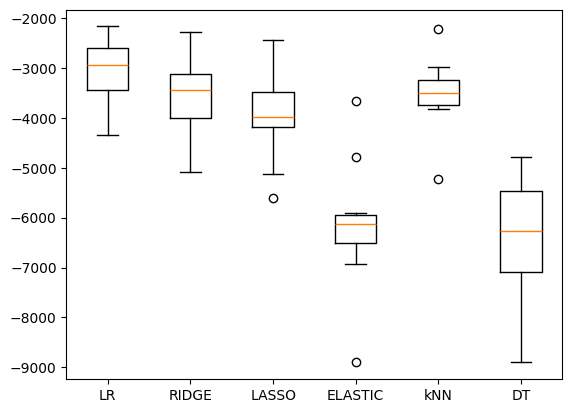

In [60]:
import matplotlib.pyplot as plt

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()


compare with normalized data

In [61]:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, normalized_X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3066.488227 (+/- 612.055025)
     RIDGE: -3074.430764 (+/- 639.089690)
     LASSO: -3138.909856 (+/- 642.229568)
   ELASTIC: -5363.726653 (+/- 1127.878163)
       kNN: -3484.692467 (+/- 747.259867)
        DT: -6649.074524 (+/- 1642.764710)


compare with standardized data

In [62]:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, standardized_X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3066.488227 (+/- 612.055025)
     RIDGE: -3065.521792 (+/- 615.480367)
     LASSO: -3079.202497 (+/- 608.234264)
   ELASTIC: -3210.719291 (+/- 709.772355)
       kNN: -3488.558375 (+/- 705.095742)
        DT: -6452.780000 (+/- 1414.305679)


# Winning Alghorithm
Linear regression and Ridge regression seem to be the best performing models based on the mean squared error.

I am choosing Linear regression model. If i dont get "good" results from this model, then i will try Ridge regression model.

# Feature Elimination

In [63]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
# feature extraction
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X_train, Y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("")
for x,y in zip(diabetes.feature_names, fit.support_):
    print("Feature: "+x+" selected: ",y)

Num Features: 4
Selected Features: [False False  True False  True  True False False  True False]
Feature Ranking: [7 3 1 2 1 1 5 4 1 6]

Feature: age selected:  False
Feature: sex selected:  False
Feature: bmi selected:  True
Feature: bp selected:  False
Feature: s1 selected:  True
Feature: s2 selected:  True
Feature: s3 selected:  False
Feature: s4 selected:  False
Feature: s5 selected:  True
Feature: s6 selected:  False


creating a dataset with the quality components

In [64]:
df1 = df[['bmi', 's1', 's2', 's5']]
df1.head()

,bmi,s1,s2,s5
0,0.06170,-0.04422,-0.03482,0.01991
1,-0.05147,-0.00845,-0.01916,-0.06833
2,0.04445,-0.04560,-0.03419,0.00286
3,-0.01160,0.01219,0.02499,0.02269
4,-0.03638,0.00393,0.01560,-0.03199


# Select only one feature

In [65]:
from sklearn.feature_selection import RFE
# feature extraction
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X_train, Y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("")
for x,y in zip(diabetes.feature_names, fit.support_):
    print("Feature: "+x+" selected: ",y)

Num Features: 1
Selected Features: [False False  True False False False False False False False]
Feature Ranking: [10  6  1  5  3  4  8  7  2  9]

Feature: age selected:  False
Feature: sex selected:  False
Feature: bmi selected:  True
Feature: bp selected:  False
Feature: s1 selected:  False
Feature: s2 selected:  False
Feature: s3 selected:  False
Feature: s4 selected:  False
Feature: s5 selected:  False
Feature: s6 selected:  False


In [66]:
diabetes_X = diabetes.data[:, np.newaxis, 2]
print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

Plot the dataset

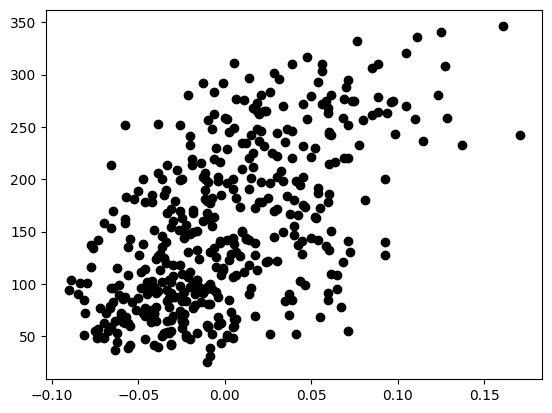

In [67]:
plt.scatter(diabetes_X, diabetes.target,  color='black')
plt.show()

Split the data into training/testing sets

In [68]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print(diabetes_X_test)

[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]


In [69]:
print(diabetes_X_test)

[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]


# Create a linear regression model

In [70]:
regr = linear_model.LinearRegression()

Train the model using the training sets

In [71]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set

In [72]:
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients & mean squared error:

In [73]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


Plot outputs

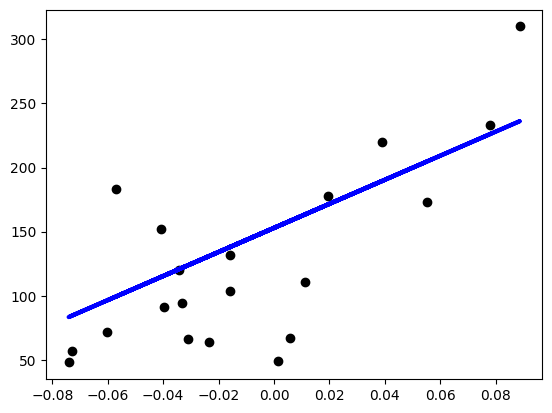

In [74]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

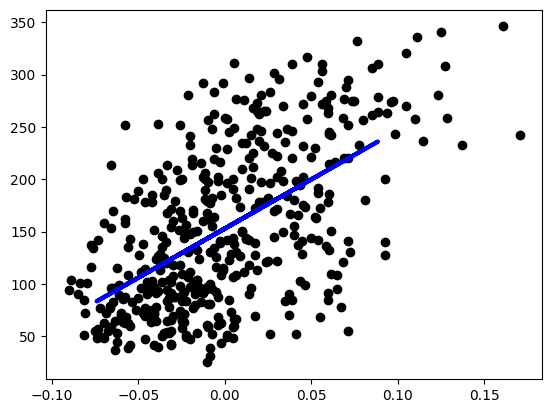

In [75]:
plt.scatter(diabetes_X, diabetes.target,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()